In [124]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

In [125]:
# Load the dataset
file_path = 'D:/K1_nam4/인공지능개론/artificial-intelligence/AI_class/artificial-intelligence/week7/dataFrame/BP_data.csv'

df = pd.read_csv(file_path)
df.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

In [127]:
df.nunique()

Patient_Number                   2000
Blood_Pressure_Abnormality          2
Level_of_Hemoglobin               757
Genetic_Pedigree_Coefficient      101
Age                                58
BMI                                41
Sex                                 2
Pregnancy                           2
Smoking                             2
Physical_activity                1951
salt_content_in_the_diet         1945
alcohol_consumption_per_day       488
Level_of_Stress                     3
Chronic_kidney_disease              2
Adrenal_and_thyroid_disorders       2
dtype: int64

In [128]:
df.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

<Figure size 800x500 with 0 Axes>

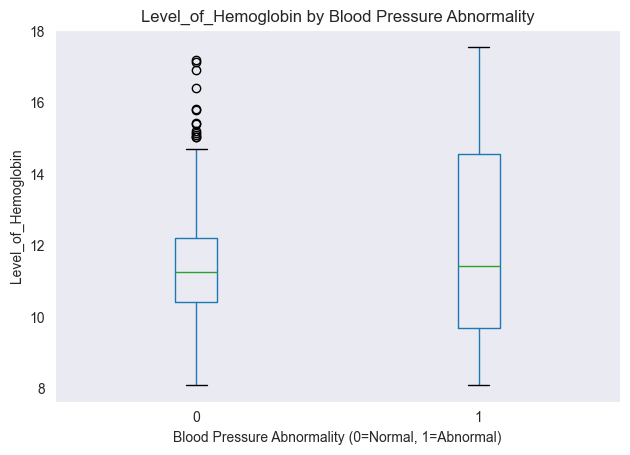

<Figure size 800x500 with 0 Axes>

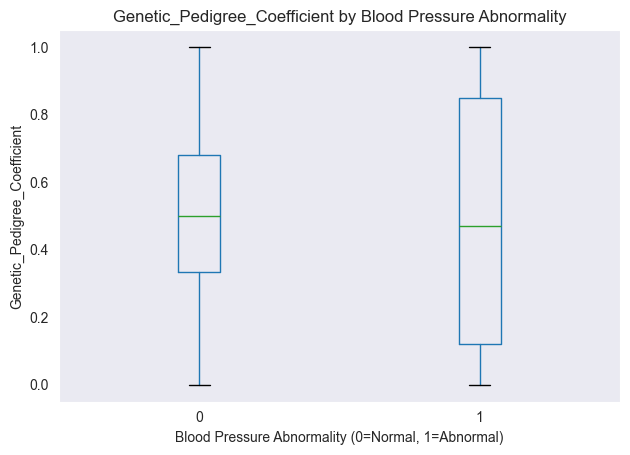

<Figure size 800x500 with 0 Axes>

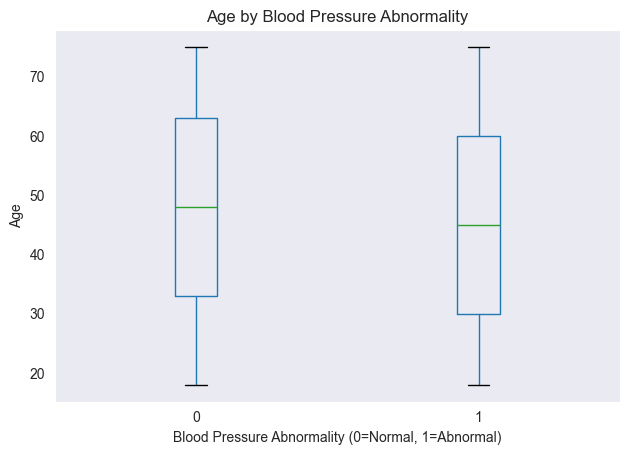

<Figure size 800x500 with 0 Axes>

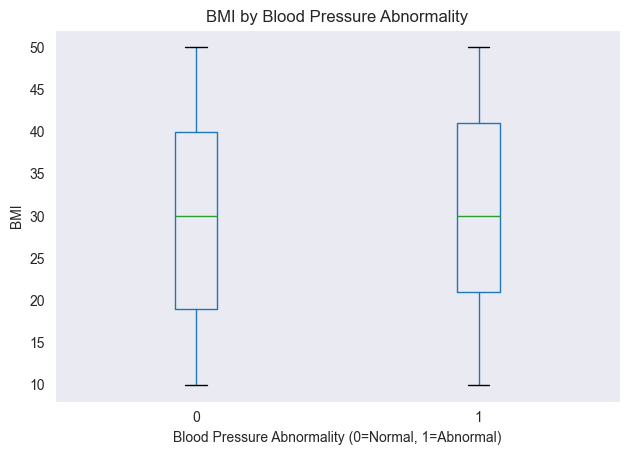

<Figure size 800x500 with 0 Axes>

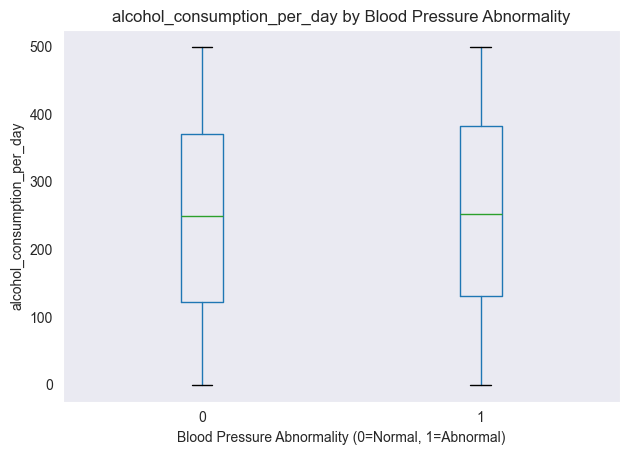

<Figure size 800x500 with 0 Axes>

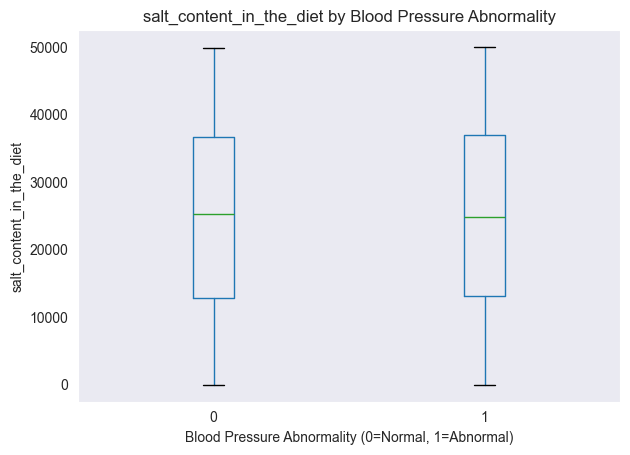

In [129]:
import matplotlib.pyplot as plt

# Drop rows with missing target label (Blood_Pressure_Abnormality)
df_clean = df.dropna(subset=["Blood_Pressure_Abnormality"])

# Compare some health factors between people with and without blood pressure abnormality
features_to_compare = [
    "Level_of_Hemoglobin",
    "Genetic_Pedigree_Coefficient",
    "Age",
    "BMI",
    "alcohol_consumption_per_day",
    "salt_content_in_the_diet"
]

# Create a boxplot for each selected feature
for feature in features_to_compare:
    plt.figure(figsize=(8, 5))
    df_clean.boxplot(column=feature, by="Blood_Pressure_Abnormality", grid=False)
    plt.title(f'{feature} by Blood Pressure Abnormality')
    plt.suptitle('')
    plt.xlabel('Blood Pressure Abnormality (0=Normal, 1=Abnormal)')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


In [130]:
# Xem tỷ lệ dữ liệu thiếu theo cột (%)
missing_info = df.isnull().mean() * 100
print("📊 Tỷ lệ dữ liệu thiếu theo cột:")
print(missing_info.sort_values(ascending=False))

# ✅ Điền giá trị trung bình hoặc phổ biến cho các cột phù hợp
df["alcohol_consumption_per_day"].fillna(df["alcohol_consumption_per_day"].mean(), inplace=True)
df["Pregnancy"].fillna(df["Pregnancy"].mean(), inplace=True)

# Nếu có cột phân loại (Sex, Smoking...) mà bị thiếu thì điền mode
for col in ["Sex", "Smoking"]:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# 🧹 Cuối cùng, xóa các hàng vẫn còn thiếu (nếu có)
df.dropna(inplace=True)

# ✅ Kiểm tra lại xem còn thiếu không
print("\n✅ Số lượng dữ liệu còn thiếu sau xử lý:")
print(df.isnull().sum())

📊 Tỷ lệ dữ liệu thiếu theo cột:
Pregnancy                        77.9
alcohol_consumption_per_day      12.1
Genetic_Pedigree_Coefficient      4.6
Level_of_Hemoglobin               0.0
Age                               0.0
Blood_Pressure_Abnormality        0.0
Patient_Number                    0.0
Sex                               0.0
BMI                               0.0
Physical_activity                 0.0
Smoking                           0.0
salt_content_in_the_diet          0.0
Level_of_Stress                   0.0
Chronic_kidney_disease            0.0
Adrenal_and_thyroid_disorders     0.0
dtype: float64

✅ Số lượng dữ liệu còn thiếu sau xử lý:
Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity          

C:\Users\Cyber game\AppData\Local\Temp\ipykernel_9356\3446889747.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["alcohol_consumption_per_day"].fillna(df["alcohol_consumption_per_day"].mean(), inplace=True)
C:\Users\Cyber game\AppData\Local\Temp\ipykernel_9356\3446889747.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

In [131]:
# Chia dữ liệu thành các cột đầu vào (X) và đầu ra (y)
X = df.drop(columns=["Blood_Pressure_Abnormality"])
y = df["Blood_Pressure_Abnormality"]
# Chuyển đổi các cột phân loại thành số nguyên
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=["object"]).columns:
    X[col] = label_encoder.fit_transform(X[col])
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Chuyển đổi dữ liệu thành Tensor
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)
# Tạo DataLoader cho tập huấn luyện và tập kiểm tra
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [132]:
# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x
# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
model = SimpleNN(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [133]:

# Train the model
num_epochs = 100
train_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')

Epoch [1/100], Loss: 49.5966
Epoch [2/100], Loss: 49.8106
Epoch [3/100], Loss: 49.9290
Epoch [4/100], Loss: 49.9290
Epoch [5/100], Loss: 49.9290
Epoch [6/100], Loss: 49.8698
Epoch [7/100], Loss: 49.8698
Epoch [8/100], Loss: 49.9290
Epoch [9/100], Loss: 49.8994
Epoch [10/100], Loss: 49.8402
Epoch [11/100], Loss: 49.9290
Epoch [12/100], Loss: 49.8994
Epoch [13/100], Loss: 49.7514
Epoch [14/100], Loss: 49.8994
Epoch [15/100], Loss: 49.7810
Epoch [16/100], Loss: 49.8994
Epoch [17/100], Loss: 49.8994
Epoch [18/100], Loss: 49.8698
Epoch [19/100], Loss: 49.8994
Epoch [20/100], Loss: 49.8994
Epoch [21/100], Loss: 49.7810
Epoch [22/100], Loss: 49.8994
Epoch [23/100], Loss: 49.8698
Epoch [24/100], Loss: 49.8698
Epoch [25/100], Loss: 49.9290
Epoch [26/100], Loss: 49.6626
Epoch [27/100], Loss: 49.8106
Epoch [28/100], Loss: 49.8994
Epoch [29/100], Loss: 49.9290
Epoch [30/100], Loss: 49.7514
Epoch [31/100], Loss: 49.7810
Epoch [32/100], Loss: 49.8402
Epoch [33/100], Loss: 49.8402
Epoch [34/100], Los

Precision: 0.5026
Recall: 1.0000
F1 Score: 0.6690
ROC AUC: 0.5000


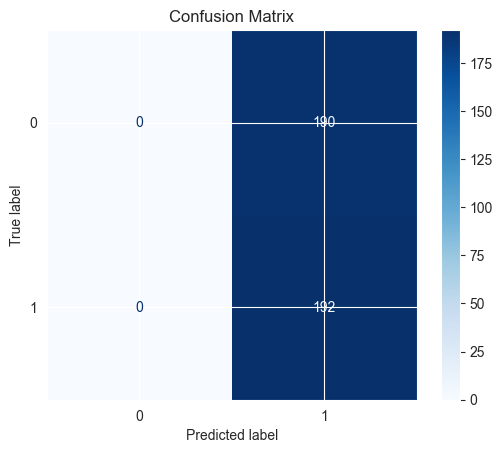

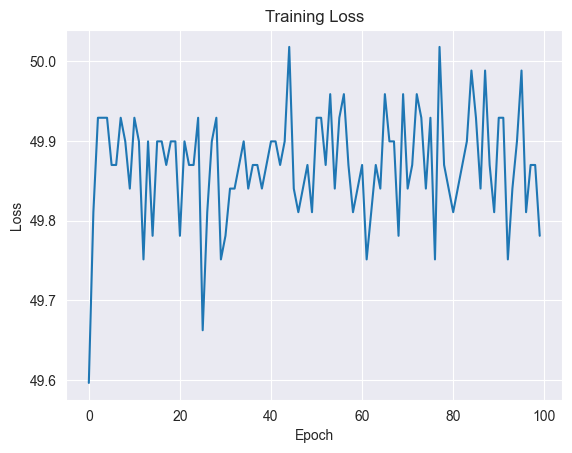

In [134]:
# Evaluate the model
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs).squeeze()
        y_pred.extend(outputs.numpy())
        y_true.extend(labels.numpy())
# Convert to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)
# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)
# Calculate evaluation g
precision = precision_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
f1 = f1_score(y_true, y_pred_binary)
roc_auc = roc_auc_score(y_true, y_pred)
    
# Print evaluation metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
# Plot training loss
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [135]:

# Model summary
summary(model, input_size=(1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]             960
              ReLU-2                [-1, 1, 64]               0
            Linear-3                [-1, 1, 32]           2,080
              ReLU-4                [-1, 1, 32]               0
            Linear-5                 [-1, 1, 1]              33
           Sigmoid-6                 [-1, 1, 1]               0
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [136]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred_binary)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.5026
